# LAB 1
In this notebook, we use the following modules `numpy` and `minotaur_maze`. The latter is a home made module, where all the solutions to the questions are implemented. 

In [1]:
import numpy as np
import minoutaur_maze as mz
import matplotlib.pyplot as plt

# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

In [2]:
# starting positions
thomas_st = (0,0)
minotaur_st = (6,5)

# no need to pick key (we have it from the beginning)
key_st = (1,)

# starting state
start = (thomas_st + minotaur_st + key_st)

# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

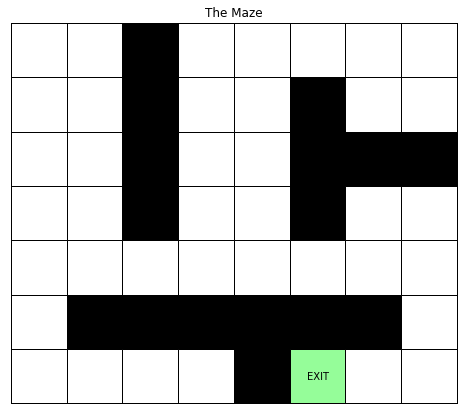

In [3]:
mz.draw_maze(maze)

## THE MINOTAUR CANNOT WAIT   

In [4]:
# Create an environment maze
minotaur_can_wait = False
key_needed = False
env_1 = mz.MinotaurMaze(maze,minotaur_can_wait,key_needed)
#env_1.show()
print('# states = ', env_1.n_states)
print('# actions = ', env_1.n_actions)

# states =  2240
# actions =  5


##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



In [5]:
# Finite horizon
horizon = 17
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env_1,horizon)

In [6]:
# Simulate the best path (reacting to random minotaur actions)
method = 'DynProg'
path, victory_prob = env_1.simulate(start, policy, method)

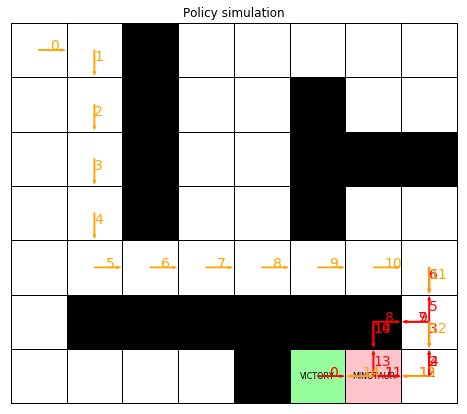

In [7]:
# Animate path 
show_arrows = True
fps = 1
mz.animate_solution(maze, path, show_arrows, fps)

In [8]:
cell_probs = env_1.minotaur_cell_probs(maze,minotaur_st,horizon)

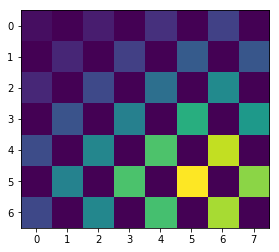

In [9]:
t = horizon
plt.imshow(cell_probs[t,:,:])

In [10]:
# Victory prob if the path is fixed
fixed_path_vict_prob = env_1.fixed_path_vict_prob(maze,path,cell_probs)
fixed_path_vict_prob

1.0

## POLICY THAT MAXIMIZES PROB. OF LEAVING FOR T = 20

In [11]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env_1,horizon)

In [12]:
# Simulate several paths and compute victory prob
method = 'DynProg'
N = 5000
paths_dict = {}
probs_dict = {}
probs = []
for n in range(N) :
    path, victory_prob = env_1.simulate(start, policy, method)
    paths_dict[n] = path
    probs_dict[n] = victory_prob
    probs.append(victory_prob)

probs.sort()
print('# SIMULATIONS = ', N)
print('Mean Victory Prob = ', sum(probs)/len(probs))

# SIMULATIONS =  5000
Mean Victory Prob =  1.0


## POLICY THAT MAXIMIZES PROB FOR T = {1, ..., 30} AND PROBABILITY OF LEAVING THE MAZE FOR EACH T


In [14]:
T_min = 1
T_max = 30
horizons = range(T_min,T_max+1)
Vs, policys = [], []
for horizon in horizons :
    V, policy = mz.dynamic_programming(env_1,horizon)
    Vs.append(V)
    policys.append(policy)

In [15]:
method = 'DynProg'
N = 5000
# Simulate N paths for each time horizon
mean_victory_probs = []
for i in range(T_max) :
    probs = []
    for n in range(N) :
        path, victory_prob = env_1.simulate(start, policys[i], method)
        probs.append(victory_prob)
    # Compute mean victory prob
    mean_victory_probs.append(sum(probs)/len(probs))

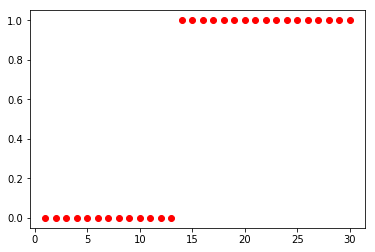

In [16]:
# Plot mean victory prob for each horizon
plt.plot(horizons, mean_victory_probs, 'ro')

## THE MINOTAUR CAN WAIT

In [17]:
# Create an environment maze
minotaur_can_wait = True
key_needed = False
env_2 = mz.MinotaurMaze(maze,minotaur_can_wait,key_needed)
#env_2.show()
print('# states = ', env_2.n_states)
print('# actions = ', env_2.n_actions)

# states =  2240
# actions =  5


##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.


In [19]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env_2,horizon)

In [18]:
# Simulate the best path (reacting to random minotaur actions)
method = 'DynProg'
path, victory_prob = env_2.simulate(start, policy, method)

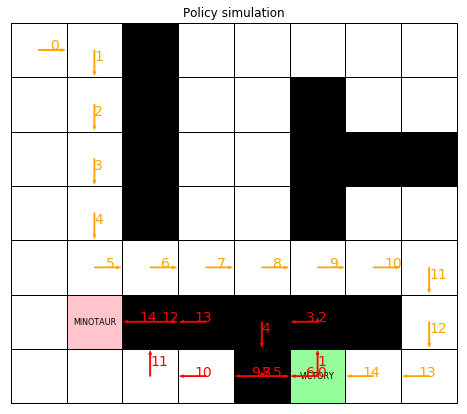

In [19]:
# Animate path 
show_arrows = True
fps = 1
mz.animate_solution(maze, path, show_arrows, fps)

In [20]:
# Cell probabilities
cell_probs = env_2.minotaur_cell_probs(maze,minotaur_st,horizon)

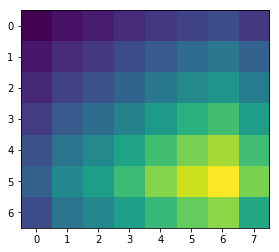

In [21]:
t = horizon
plt.imshow(cell_probs[t,:,:])

In [22]:
# Victory prob if the path is fixed
fixed_path_vict_prob = env_2.fixed_path_vict_prob(maze,path,cell_probs)
fixed_path_vict_prob

0.7116482058310947

## POLICY THAT MAXIMIZES PROB FOR T = {1, ..., 30} AND PROBABILITY OF LEAVING THE MAZE FOR EACH T

In [23]:
T_min = 1
T_max = 30
horizons = range(T_min,T_max+1)
Vs, policys = [], []
for horizon in horizons :
    V, policy = mz.dynamic_programming(env_2,horizon)
    Vs.append(V)
    policys.append(policy)

In [24]:
method = 'DynProg'
N = 5000
# Simulate N paths for each time horizon
mean_victory_probs = []
for i in range(T_max) :
    probs = []
    for n in range(N) :
        path, victory_prob = env_2.simulate(start, policys[i], method)
        probs.append(victory_prob)
    # Compute mean victory prob
    mean_victory_probs.append(sum(probs)/len(probs))

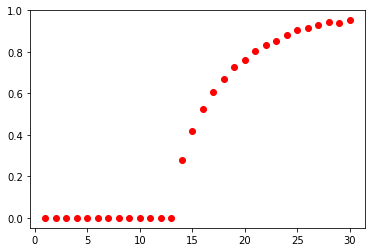

In [25]:
# Plot mean victory prob for each horizon
plt.plot(horizons, mean_victory_probs, 'ro')

## GEOMETRICALLY DISTRIBUTED LIFE (TIME HORIZON) WITH MEAN 30

In [26]:
# Finite horizon
gamma = 29/30
epsilon = 0.0001
# Solve the MDP problem with value iteration
V, policy = mz.value_iteration(env_1,gamma,epsilon)

In [27]:
# Simulate the best path (reacting to random minotaur actions)
method = 'ValIter'
path, victory_prob = env_1.simulate(start, policy, method)

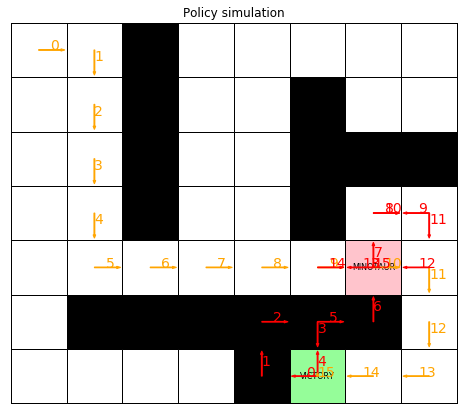

In [28]:
# Animate path 
show_arrows = True
fps = 1
mz.animate_solution(maze, path, show_arrows, fps)

## PROBABILITY OF GETTING OUT ALIVE USING THE VALUE ITERATION POLICY

### If the minotaur cannot wait

In [35]:
E_T_max = 62
E_T_min = 2
E_Ts = range(E_T_min,E_T_max,2)
Vs, policys = [], []
gammas = []
epsilon = 0.0001
for E_T in E_Ts :
    gamma = (E_T-1)/E_T
    gammas.append(gamma)
    V, policy = mz.value_iteration(env_1,gamma,epsilon)
    Vs.append(V)
    policys.append(policy)

In [37]:
method = 'ValIter'
N = 5000
# Simulate N paths for each gamma
mean_victory_probs = []
for i in range(len(gammas)) :
    probs = []
    for n in range(N) :
        path, victory_prob = env_1.simulate(start, policys[i], method)
        probs.append(victory_prob)
    # Compute mean victory prob
    mean_victory_probs.append(sum(probs)/len(probs))

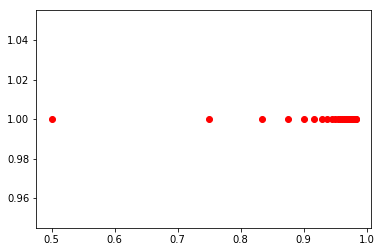

In [38]:
# Plot mean victory prob for each gamma
plt.plot(gammas, mean_victory_probs, 'ro')

### If the minotaur can wait

In [39]:
E_T_max = 62
E_T_min = 2
E_Ts = range(E_T_min,E_T_max,2)
Vs, policys = [], []
gammas = []
epsilon = 0.0001
for E_T in E_Ts :
    gamma = (E_T-1)/E_T
    gammas.append(gamma)
    V, policy = mz.value_iteration(env_2,gamma,epsilon)
    Vs.append(V)
    policys.append(policy)

In [40]:
method = 'ValIter'
N = 5000
# Simulate N paths for each gamma
mean_victory_probs = []
for i in range(len(gammas)) :
    probs = []
    for n in range(N) :
        path, victory_prob = env_2.simulate(start, policys[i], method)
        probs.append(victory_prob)
    # Compute mean victory prob
    mean_victory_probs.append(sum(probs)/len(probs))

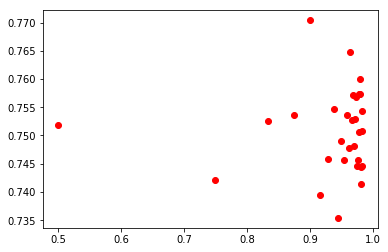

In [41]:
# Plot mean victory prob for each gamma
plt.plot(gammas, mean_victory_probs, 'ro')

## IF WE NEED THE KEY TO SCAPE

In [2]:
# starting positions
thomas_st = (0,0)
minotaur_st = (6,5)

# we need to pick the key (we dont have it from the beginning)
key_st = (0,)

# starting state
start = (thomas_st + minotaur_st + key_st)

# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key

In [3]:
# Create an environment maze
minotaur_can_wait = False
key_needed = True
env_3 = mz.MinotaurMaze(maze,minotaur_can_wait,key_needed)
#env_1.show()
print('# states = ', env_3.n_states)
print('# actions = ', env_3.n_actions)

# states =  4480
# actions =  5


## Solving with Value Iteration

In [4]:
# Finite horizon
gamma = 59/60
epsilon = 0.0001
# Solve the MDP problem with value iteration
V, policy = mz.value_iteration(env_3,gamma,epsilon)

In [5]:
# Simulate the best path (reacting to random minotaur actions)
method = 'ValIter'
path, victory_prob = env_3.simulate(start, policy, method)

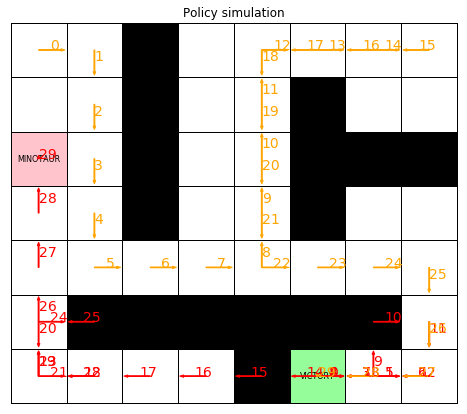

In [6]:
# Animate path 
show_arrows = True
fps = 10
mz.animate_solution(maze, path, show_arrows, fps)

## Solving with Q-Learning

### Fixing learning rate and modifying epsilon

### $\epsilon = 0.5$

In [7]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 0.5
Q, policy, init_Vs = mz.qLearning(env_3, start, gamma, epsilon, 
    n_episodes=50000,
    max_iters=100,
    exp_decreasing_decay=0.
)

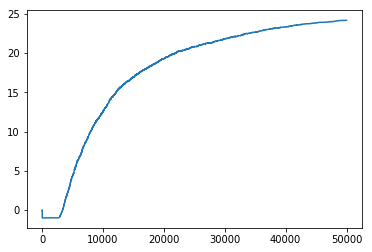

In [8]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [9]:
# Simulate the best path (reacting to random minotaur actions)
method = 'Q-Learning'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)

### $\epsilon = 0.2$

In [10]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 0.2
Q, policy, init_Vs = mz.qLearning(env_3, start, gamma, epsilon, 
    n_episodes=50000,
    max_iters=100,
    exp_decreasing_decay=0.
)

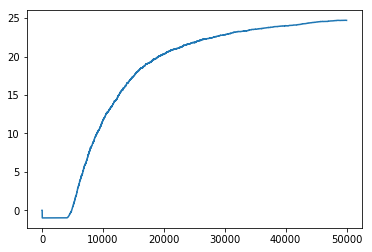

In [11]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [12]:
# Simulate the best path (reacting to random minotaur actions)
method = 'Q-Learning'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)

### Fixing $\epsilon$ and modifying learning rate

### lr_alpha = 0.55

In [13]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 0.35
Q, policy, init_Vs = mz.qLearning(env_3, start, gamma, epsilon, 
    n_episodes=50000, 
    max_iters=100, 
    exp_decreasing_decay=0.,
    lr_alpha = 0.55
)

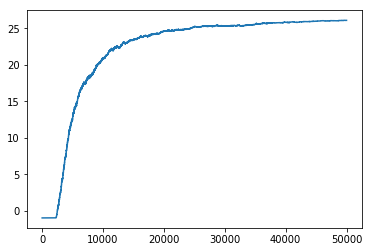

In [14]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [15]:
# Simulate the best path (reacting to random minotaur actions)
method = 'Q-Learning'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)

### lr_alpha = 0.8

In [16]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 0.35
Q, policy, init_Vs = mz.qLearning(env_3, start, gamma, epsilon, 
    n_episodes=50000, 
    max_iters=100, 
    exp_decreasing_decay=0.,
    lr_alpha = 0.8
)

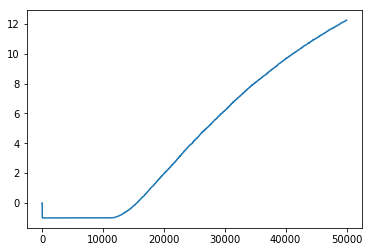

In [17]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [18]:
# Simulate the best path (reacting to random minotaur actions)
method = 'Q-Learning'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)

## Solving with SARSA

### Fixing learning rate and modifying epsilon

### $\epsilon = 0.2$

In [4]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 0.2
Q, policy, init_Vs = mz.sarsa(env_3, start, gamma, epsilon, 
    n_episodes=50000,
    max_iters=100,
    exp_decreasing_decay=0.
)

4407 3
4360 2
4401 0
4441 1
4400 4
4087 3
4400 0
4440 4
4127 4
4453 4
4417 0
4377 2
4418 1
4457 2
4138 3
3814 0
3774 4
3818 3
4134 1
3813 3
4127 4
4453 0
4133 2
4454 1
4133 0
4453 4
4417 2
4098 3
4134 4
4458 0
4138 0
4458 0
4138 1
4457 2
4418 4
4464 2
4425 2
4106 0
3786 0
3466 2
3427 1
3746 3
4059 3
4095 3
4409 4
4455 0
4415 4
4379 3
4055 2
3736 1
3415 2
3376 4
3340 1
3659 4
3626 2
3587 1
3626 1
3305 2
3626 2
3947 1
4266 1
4225 2
4186 3
4219 4
4186 3
3859 3
4175 2
3856 3
4170 0
4210 0
4250 3
4203 0
4163 4
3850 0
4170 3
3843 4
4170 4
4216 4
4180 4
4227 1
4186 0
4226 0
4266 3
4299 3
4255 4
4219 4
3906 1
4225 0
4185 1
4224 3
4258 4
3944 0
3984 2
4025 1
4344 2
4305 1
4344 2
4385 2
4426 3
4099 0
4407 3
4440 2
4121 1
4440 0
4400 4
4447 0
4127 4
4453 4
4417 4
4463 0
4423 2
4104 0
4424 1
4463 4
4431 4
4473 2
4434 1
4113 0
3793 3
3471 4
3793 2
3834 0
3514 1
3833 2
3514 1
3833 0
3513 0
3473 2
3514 2
3195 2
2876 0
2556 0
2516 0
2556 0
2516 0
2556 1
2875 0
2555 2
2876 0
3196 0
3516 1
3195 1
2874 0

KeyboardInterrupt: 

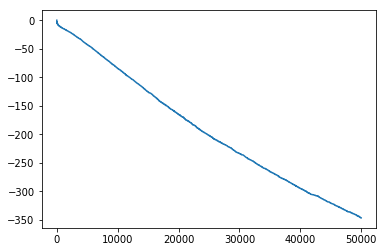

In [5]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [6]:
# Simulate the best path (reacting to random minotaur actions)
method = 'SARSA'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)

### $\epsilon = 0.1$

In [12]:
# T is Geo(1-gamma)
gamma = 59/60
# Initial exploration prob.
epsilon = 1
Q, policy, init_Vs = mz.sarsa(env_3, start, gamma, epsilon, 
    n_episodes=50000,
    max_iters=100,
    exp_decreasing_decay=0.001
)

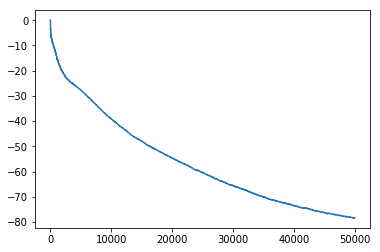

In [13]:
# Plot tot reward for each episode
plt.plot(range(len(init_Vs)), init_Vs)

In [10]:
# Simulate the best path (reacting to random minotaur actions)
method = 'SARSA'
path, victory_prob = env_3.simulate(start, policy, method)
# Animate path 
show_arrows = True
fps = 10
#mz.animate_solution(maze, path, show_arrows, fps)